# In this notebook I analyze sneaker data that I have scraped from a sneaker website.

# What I did.
> I scraped data from a after market sneaker website using the python library Scrapy. What I first wanted to do with this project was scrape 2 websites. I wanted to scrape the websites and find a specific shoe and have it tell me which site had the shoe I wanted for a better price. I will probably go back to that but I got carried away with scraping more and more data. 

In [27]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

In [5]:
conn = sqlite3.connect("../sneaker_scraper/main_sneakers.db")

# Getting all tables in database
> I collected my data all in seperate in tables for some reason and I had to select them all. This is how I did it but there is probably a more efficient way

In [6]:
before_2001 = pd.read_sql_query("select * from before_2001;", conn)
year_2001 = pd.read_sql_query("select * from year2001;", conn)
year_2002 = pd.read_sql_query("select * from year2002;", conn)
year_2003 = pd.read_sql_query("select * from year2003;", conn)
year_2004 = pd.read_sql_query("select * from year2004;", conn)
year_2005 = pd.read_sql_query("select * from year2005;", conn)
year_2006 = pd.read_sql_query("select * from year2006;", conn)
year_2007 = pd.read_sql_query("select * from year2007;", conn)
year_greater = pd.read_sql_query("select * from year2008_and_09;", conn)

# Combining all the dataframes into one

In [7]:
all_years = pd.concat([before_2001, year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_greater])

# Cleaning some of the data
> - Get rid of duplicates and keep it's first occurance if there are
> - Get rid of ID columns
> - Set the price column as an int
> - Set brands as str

In [8]:
all_years = all_years.drop_duplicates(subset="sneaker", keep="first")
all_years = all_years.drop("id", axis=1)
all_years = all_years.astype({'price': 'int32'})
all_years = all_years.astype({'brand': 'str'})

# This is some of the partialy clean data

In [9]:
all_years

,sneaker,price,brand,date
0,['Jordan 15 OG Low Black Silver'],300,Jordan,release: 09/06/2000
1,['Jordan 15 OG Low White Red'],300,Jordan,release: 01/01/2000
2,['Jordan 15 OG Low Midnight Navy'],325,Jordan,release: 01/01/2000
3,['Jordan 14 OG Low Ginger'],755,Jordan,release: 09/15/1999
4,['Jordan 14 OG Low Columbia Blue'],399,Jordan,release: 08/04/1999
...,...,...,...,...
2684,['Jordan Trainer ST G White Obsidian'],209,Jordan,release: 11/02/2018
2685,['Jordan Legacy 312 Rookie of the Year'],70,Jordan,release: 11/01/2018
2686,['Jordan 1 Retro Low Utility Pack (W)'],53,Jordan,release: 11/01/2018
2687,['Air Max 90 Ultra Mid Winter Black'],138,Air,release: 11/01/2018


# More data cleaning/formating
> I'm creating a new dataframe with some things I want and leaving out what I don't need.
> For example
> - Years to only be `2000` instead of `release: 11/09/2000`
> - Secting price column
> - Selecting brand column

In [10]:
price = all_years.iloc[:,1]
brands = all_years.iloc[:,2]
years = all_years.iloc[:,3].str[15:]

# Making final data frame
> Using selected columns I then created a new data frame with only:
> - Brand of shoe
> - Price of shoe
> - Year it was release

In [11]:
shoe_data_by_year = list(zip(brands, price, years))
shoe_df = pd.DataFrame(shoe_data_by_year, columns = ['brand', 'price', 'year'])

In [12]:
shoe_df

,brand,price,year
0,Jordan,300,2000
1,Jordan,300,2000
2,Jordan,325,2000
3,Jordan,755,1999
4,Jordan,399,1999
...,...,...,...
2687,Jordan,209,2018
2688,Jordan,70,2018
2689,Jordan,53,2018
2690,Air,138,2018


In [13]:
avg_by_year = shoe_df.groupby('year').mean()
avg_by_brand = shoe_df.groupby('brand').mean()

In [14]:
avg_by_year

,price
year,
1997,480.000000
1998,350.000000
1999,472.750000
2000,308.333333
2001,414.428571
2002,405.266667
2003,363.360000
2004,415.105263
2005,391.297872


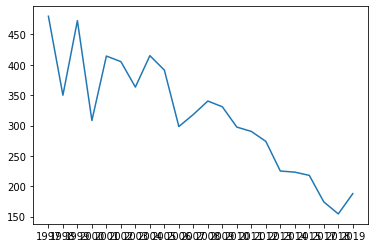

In [15]:
#find highest brand every year
#find most expensive and least expensive in data for every year
#find other things as well
plt.plot(avg_by_year)

In [16]:
prices = avg_by_year['price'][0:]
year = avg_by_year.index

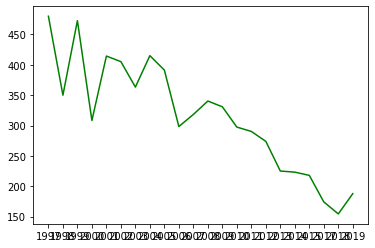

In [17]:
plt.plot(year, prices,'-g')

In [18]:
shoe_df

,brand,price,year
0,Jordan,300,2000
1,Jordan,300,2000
2,Jordan,325,2000
3,Jordan,755,1999
4,Jordan,399,1999
...,...,...,...
2687,Jordan,209,2018
2688,Jordan,70,2018
2689,Jordan,53,2018
2690,Air,138,2018


In [19]:
year_1998 = shoe_df.groupby(['year']).get_group('1998')
year_1998 = year_1998.groupby('brand').mean()
jordan_1998 = year_1998.loc['Jordan','price']


# 

year_1999 = shoe_df.groupby(['year']).get_group('1999')
year_1999 = year_1999.groupby('brand').mean()
jordan_1999 = year_1999.loc['Jordan','price']
nike_1999 = year_1999.loc['Air','price']


# #
year_2000 = shoe_df.groupby(['year']).get_group('2000')
year_2000 = year_2000.groupby('brand').mean()
jordan_2000 = year_2000.loc['Jordan','price']

#
year_2001 = shoe_df.groupby(['year']).get_group('2001')
year_2001 = year_2001.groupby('brand').mean()
jordan_2001 = year_2001.loc['Jordan','price']
nike_2001 = year_2001.loc['Air','price']

In [20]:
#
year_2002 = shoe_df.groupby(['year']).get_group('2002')
year_2002 = year_2002.groupby('brand').mean()
nike_avg_price_2002 = year_2002.loc['Nike','price']
air_avg_price_2002 = year_2002.loc['Air','price']
nike_2002 = nike_avg_price_2002 + air_avg_price_2002
jordan_2002 = year_2002.loc['Jordan','price']

#
year_2003 = shoe_df.groupby(['year']).get_group('2003')
year_2003 = year_2003.groupby('brand').mean()
nike_avg_price_2003 = year_2003.loc['Nike','price']
air_avg_price_2003 = year_2003.loc['Air','price']
nike_2003 = nike_avg_price_2003 + air_avg_price_2003
jordan_2003 = year_2003.loc['Jordan','price']

#
year_2004 = shoe_df.groupby(['year']).get_group('2004')
year_2004 = year_2004.groupby('brand').mean()
nike_avg_price_2004 = year_2004.loc['Nike','price']
air_avg_price_2004 = year_2004.loc['Air','price']
nike_2004 = nike_avg_price_2004 + air_avg_price_2004
jordan_2004 = year_2004.loc['Jordan','price']




#
year_2005 = shoe_df.groupby(['year']).get_group('2005')
year_2005 = year_2005.groupby('brand').mean()
nike_avg_price_2005 = year_2005.loc['Nike','price']
air_avg_price_2005 = year_2005.loc['Air','price']
nike_2005 = nike_avg_price_2005 + air_avg_price_2005
jordan_2005 = year_2005.loc['Jordan','price']




#
year_2006 = shoe_df.groupby(['year']).get_group('2006')
year_2006 = year_2006.groupby('brand').mean()
nike_2006 = year_2006.loc['Nike','price']
jordan_2006 = year_2006.loc['Jordan','price']




#
year_2007 = shoe_df.groupby(['year']).get_group('2007')
year_2007 = year_2007.groupby('brand').mean()
nike_avg_price_2007 = year_2007.loc['Nike','price']
air_avg_price_2007 = year_2007.loc['Air','price']
nike_2007 = nike_avg_price_2007 + air_avg_price_2007
jordan_2007 = year_2007.loc['Jordan','price']
############


#
year_2008 = shoe_df.groupby(['year']).get_group('2008')
year_2008 = year_2008.groupby('brand').mean()
nike_avg_price_2008 = year_2008.loc['Nike','price']
air_avg_price_2008 = year_2008.loc['Air','price']
nike_2008 = nike_avg_price_2008 + air_avg_price_2008
adidas_2008 = year_2008.loc['adidas','price']
jordan_2008= year_2008.loc['Jordan','price']



# #
year_2009 = shoe_df.groupby(['year']).get_group('2009')
year_2009 = year_2009.groupby('brand').mean()
nike_avg_price_2009 = year_2009.loc['Nike','price']
air_avg_price_2009 = year_2009.loc['Air','price']
nike_2009 = nike_avg_price_2009 + air_avg_price_2009
adidas_2009 = year_2009.loc['adidas','price']
jordan_2009= year_2009.loc['Jordan','price']



# # #
year_2010 = shoe_df.groupby(['year']).get_group('2010')
year_2010 = year_2010.groupby('brand').mean()
nike_avg_price_2010 = year_2010.loc['Nike','price']
air_avg_price_2010 = year_2010.loc['Air','price']
nike_2010 = nike_avg_price_2010 + air_avg_price_2010
adidas_2010 = year_2010.loc['adidas','price']
jordan_2010= year_2010.loc['Jordan','price']
adidas_2010= year_2010.loc['adidas','price']




# #
year_2011 = shoe_df.groupby(['year']).get_group('2011')
year_2011 = year_2011.groupby('brand').mean()
air_avg_price_2011 = year_2011.loc['Air','price']
nike_avg_price_2011 = year_2011.loc['Nike','price']
nike_2011 = nike_avg_price_2011 + air_avg_price_2011
adidas_2011 = year_2011.loc['adidas','price']
jordan_2011= year_2011.loc['Jordan','price']

# #
year_2012 = shoe_df.groupby(['year']).get_group('2012')
year_2012 = year_2012.groupby('brand').mean()
air_avg_price_2012 = year_2012.loc['Air','price']
nike_avg_price_2012 = year_2012.loc['Nike','price']
nike_2012 = nike_avg_price_2012 + air_avg_price_2012
adidas_2012 = year_2012.loc['adidas','price']
jordan_2012= year_2012.loc['Jordan','price']


# #
year_2013 = shoe_df.groupby(['year']).get_group('2013')
year_2013 = year_2013.groupby('brand').mean()
air_avg_price_2013 = year_2013.loc['Air','price']
nike_avg_price_2013 = year_2013.loc['Nike','price']
nike_2013 = nike_avg_price_2013 + air_avg_price_2013
adidas_2013 = year_2013.loc['adidas','price']
jordan_2013= year_2013.loc['Jordan','price']

# #
year_2014 = shoe_df.groupby(['year']).get_group('2014')
year_2014 = year_2014.groupby('brand').mean()
air_avg_price_2014 = year_2014.loc['Air','price']
nike_avg_price_2014 = year_2014.loc['Nike','price']
nike_2014 = nike_avg_price_2014 + air_avg_price_2014
adidas_2014 = year_2014.loc['adidas','price']
jordan_2014= year_2014.loc['Jordan','price']

# #
year_2015 = shoe_df.groupby(['year']).get_group('2015')
year_2015 = year_2015.groupby('brand').mean()
air_avg_price_2015 = year_2015.loc['Air','price']
nike_avg_price_2015 = year_2015.loc['Nike','price']
nike_2015 = nike_avg_price_2015 + air_avg_price_2015
adidas_2015 = year_2015.loc['adidas','price']
jordan_2015= year_2013.loc['Jordan','price']


# # year_2016 = shoe_df.groupby(['year']).get_group('2016')
year_2017 = shoe_df.groupby(['year']).get_group('2017')
year_2017 = year_2017.groupby('brand').mean()
air_avg_price_2017 = year_2017.loc['Air','price']
nike_avg_price_2017 = year_2017.loc['Nike','price']
nike_2017 = nike_avg_price_2017 + air_avg_price_2017
adidas_2017 = year_2017.loc['adidas','price']
jordan_2017= year_2017.loc['Jordan','price']


# #
year_2018 = shoe_df.groupby(['year']).get_group('2018')
year_2018 = year_2018.groupby('brand').mean()
air_avg_price_2018= year_2018.loc['Air','price']
nike_avg_price_2018 = year_2018.loc['Nike','price']
nike_2018 = nike_avg_price_2018 + air_avg_price_2018
adidas_2018 = year_2018.loc['adidas','price']
jordan_2018= year_2018.loc['Jordan','price']

# #
year_2019 = shoe_df.groupby(['year']).get_group('2019')
year_2019 = year_2019.groupby('brand').mean()
air_avg_price_2019 = year_2019.loc['Air','price']
nike_avg_price_2019 = year_2019.loc['Nike','price']
nike_2019 = nike_avg_price_2019 + air_avg_price_2019
adidas_2019 = year_2019.loc['adidas','price']
jordan_2019= year_2019.loc['Jordan','price']

In [21]:
adidas = {'Price': [0,0, 0, 0, 0, 0, 0, 0, 0, 0, adidas_2008, adidas_2009, adidas_2010, adidas_2011, adidas_2012, adidas_2013, adidas_2014, adidas_2015, adidas_2017, adidas_2018, adidas_2019],
        'Year': [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007,2008 , 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019]}
adidas_by_years = pd.DataFrame(adidas) 

nike = {'Price': [0, nike_1999, 0, nike_2001, nike_2002, nike_2003, nike_2004, nike_2005, nike_2006, nike_2007, nike_2008, nike_2009, nike_2010, nike_2011, nike_2012, nike_2013, nike_2014, nike_2015, nike_2017, nike_2018, nike_2019],
        'Year': [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007,2008 , 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019]}
nike_by_years = pd.DataFrame(nike)

jordan = {'Price': [jordan_1998, nike_1999, jordan_2000, jordan_2001, jordan_2002, jordan_2003, jordan_2004, jordan_2005, jordan_2006, jordan_2007, jordan_2008, jordan_2009, jordan_2010, jordan_2011, jordan_2012, jordan_2013, jordan_2014, jordan_2015, jordan_2017, jordan_2018, jordan_2019],
        'Year': [1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007,2008 , 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2017, 2018, 2019]}
jordan_by_years = pd.DataFrame(jordan)


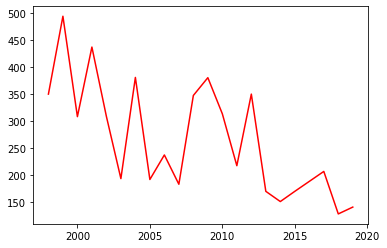

In [22]:
plt.plot(jordan_by_years['Year'], jordan_by_years['Price'],'-r')

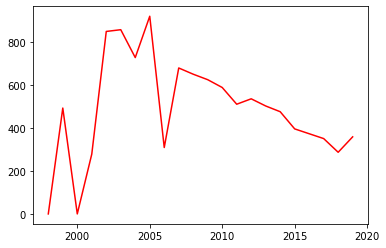

In [23]:
plt.plot(nike_by_years['Year'], nike_by_years['Price'],'-r')

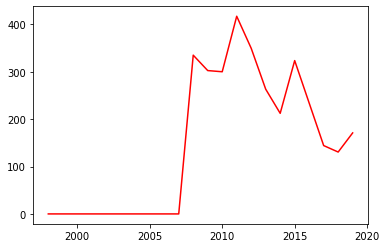

In [24]:
plt.plot(adidas_by_years['Year'], adidas_by_years['Price'],'-r')

# Graphs combined
> I only used the average from adidas, jordan, and nike because they are the main brands. Yes there are more but these are the more important ones tbh

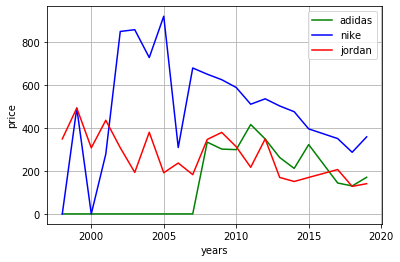

In [25]:
plt.plot(adidas_by_years['Year'], adidas_by_years['Price'],'-g', label='adidas')
plt.plot(nike_by_years['Year'], nike_by_years['Price'],'-b', label='nike')
plt.plot(jordan_by_years['Year'], jordan_by_years['Price'],'-r', label='jordan')
plt.xlabel('years')
plt.ylabel('price')
plt.legend()
plt.grid(True)

In [41]:
year_1999 = shoe_df.groupby(['year']).get_group('1999')
year_1998 = shoe_df.groupby(['year']).get_group('1998')
year_2000 = shoe_df.groupby(['year']).get_group('2000')
year_2001 = shoe_df.groupby(['year']).get_group('2001')
year_2002 = shoe_df.groupby(['year']).get_group('2002')
year_2003 = shoe_df.groupby(['year']).get_group('2003')
year_2004 = shoe_df.groupby(['year']).get_group('2004')
year_2005 = shoe_df.groupby(['year']).get_group('2005')
year_2006 = shoe_df.groupby(['year']).get_group('2006')
year_2007 = shoe_df.groupby(['year']).get_group('2007')
year_2008 = shoe_df.groupby(['year']).get_group('2008')
year_2009 = shoe_df.groupby(['year']).get_group('2009')
year_2010 = shoe_df.groupby(['year']).get_group('2010')
year_2011 = shoe_df.groupby(['year']).get_group('2011')
year_2012 = shoe_df.groupby(['year']).get_group('2012')
year_2013 = shoe_df.groupby(['year']).get_group('2013')
year_2014 = shoe_df.groupby(['year']).get_group('2014')
year_2015 = shoe_df.groupby(['year']).get_group('2015')
year_2017 = shoe_df.groupby(['year']).get_group('2017')
year_2018 = shoe_df.groupby(['year']).get_group('2018')
year_2019 = shoe_df.groupby(['year']).get_group('2019')

In [58]:
avg_table = all_years.groupby('brand').mean()
# avg_table

,price
brand,
A,710.750000
ASICS,237.945055
Adidas,232.500000
Air,228.344398
Alife,200.000000
Asics,298.043478
Balenciaga,643.875000
Bape,390.500000
Barkley,154.750000


In [83]:
nike_pt1 = avg_table.loc['Nike']
nike_pt2 = avg_table.loc['Air']
nike_pt3 = avg_table.loc['Off-White']
nike_pt4 = avg_table.loc['VaporMax']
nike_pt5 = avg_table.loc['Dunk']
leBron = avg_table.loc['LeBron']
lebron = avg_table.loc['Lebron']
#######
main_nike = ((nike_pt1 +nike_pt2 + nike_pt3 + nike_pt4 + nike_pt5 + leBron + lebron)/7)
#######
adidas_pt1 = avg_table.loc['adidas']
adidas_pt2 = avg_table.loc['Adidas']
main_adidas = ((adidas_pt1 + adidas_pt2)/2)
#######
asics = avg_table.loc['ASICS']
balenciaga = avg_table.loc['Balenciaga']
reebok = avg_table.loc['Reebok']
new_balace = avg_table.loc['New']
########
jordan = avg_table.loc['Jordan']
air_jordan = avg_table.loc['Air']
main_jordan = ((jordan+air_jordan)/2)

nike_avg_price = float(main_nike)
adidas_avg_price = float(main_adidas)
jordan_avg_price = float(main_jordan)
asics_avg_price = avg_table.loc['ASICS','price']
balenciaga_avg_price = avg_table.loc['Balenciaga','price']
reebok_avg_price = avg_table.loc['Reebok','price']
new_balance_avg_price = avg_table.loc['New','price']

In [86]:
data = {'Price': [nike_avg_price, adidas_avg_price, asics_avg_price, balenciaga_avg_price, 
                  reebok_avg_price, new_balance_avg_price, jordan_avg_price],
        'Brand': ['Nike', 'adidas', 'asics', 'balenci', 'reebok', 'new', 'jordan']}
newdf = pd.DataFrame(data)

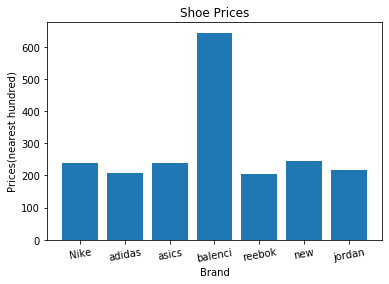

In [89]:
index = np.arange(len(newdf))
plt.bar(index, newdf['Price'])
plt.xlabel('Brand', fontsize=10)
plt.ylabel('Prices(nearest hundred)', fontsize=10)
plt.xticks(index, newdf['Brand'], fontsize=10, rotation=10)
plt.title('Shoe Prices')
plt.show()